In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
print(os.listdir('/truba/home/hkocak/dataHilal/'))

['list_eval_partition.csv', 'list_bbox_celeba.csv', 'list_landmarks_align_celeba.csv', 'list_attr_celeba.csv', 'img_align_celeba']



We have 5 files in the dataset folder.

* img_align_celeba.zip Here all face images are cropped and aligned.

* list_eval_partition.csv: It is recommended to divide it into parts as s1-162770 training, 162771-182637 are validation, 182638-202599 tests.

* list_bbox_celeba.csv: x1 and y1 represent the top left coordinate of the box. Wieght and height represent the width and height.

* list_landmarks_align_celeba.csv : Image landmarks and their respective coordinates. There are 5 landmarks: left eye, right eye, nose, left mouth, right mouth

* list_attr_celeba.csv: Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative


In [4]:
# Distribution histogram/bar graphs of data by column
#nGraphPerRow: How many graphs to show in each row.
# nGraphShown: How many graphs to show.
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


# list_attr_celeba.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# list_attr_celeba.csv has 202599 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/truba/home/hkocak/dataHilal/list_attr_celeba.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'list_attr_celeba.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 41 columns


In [7]:
df1.head(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


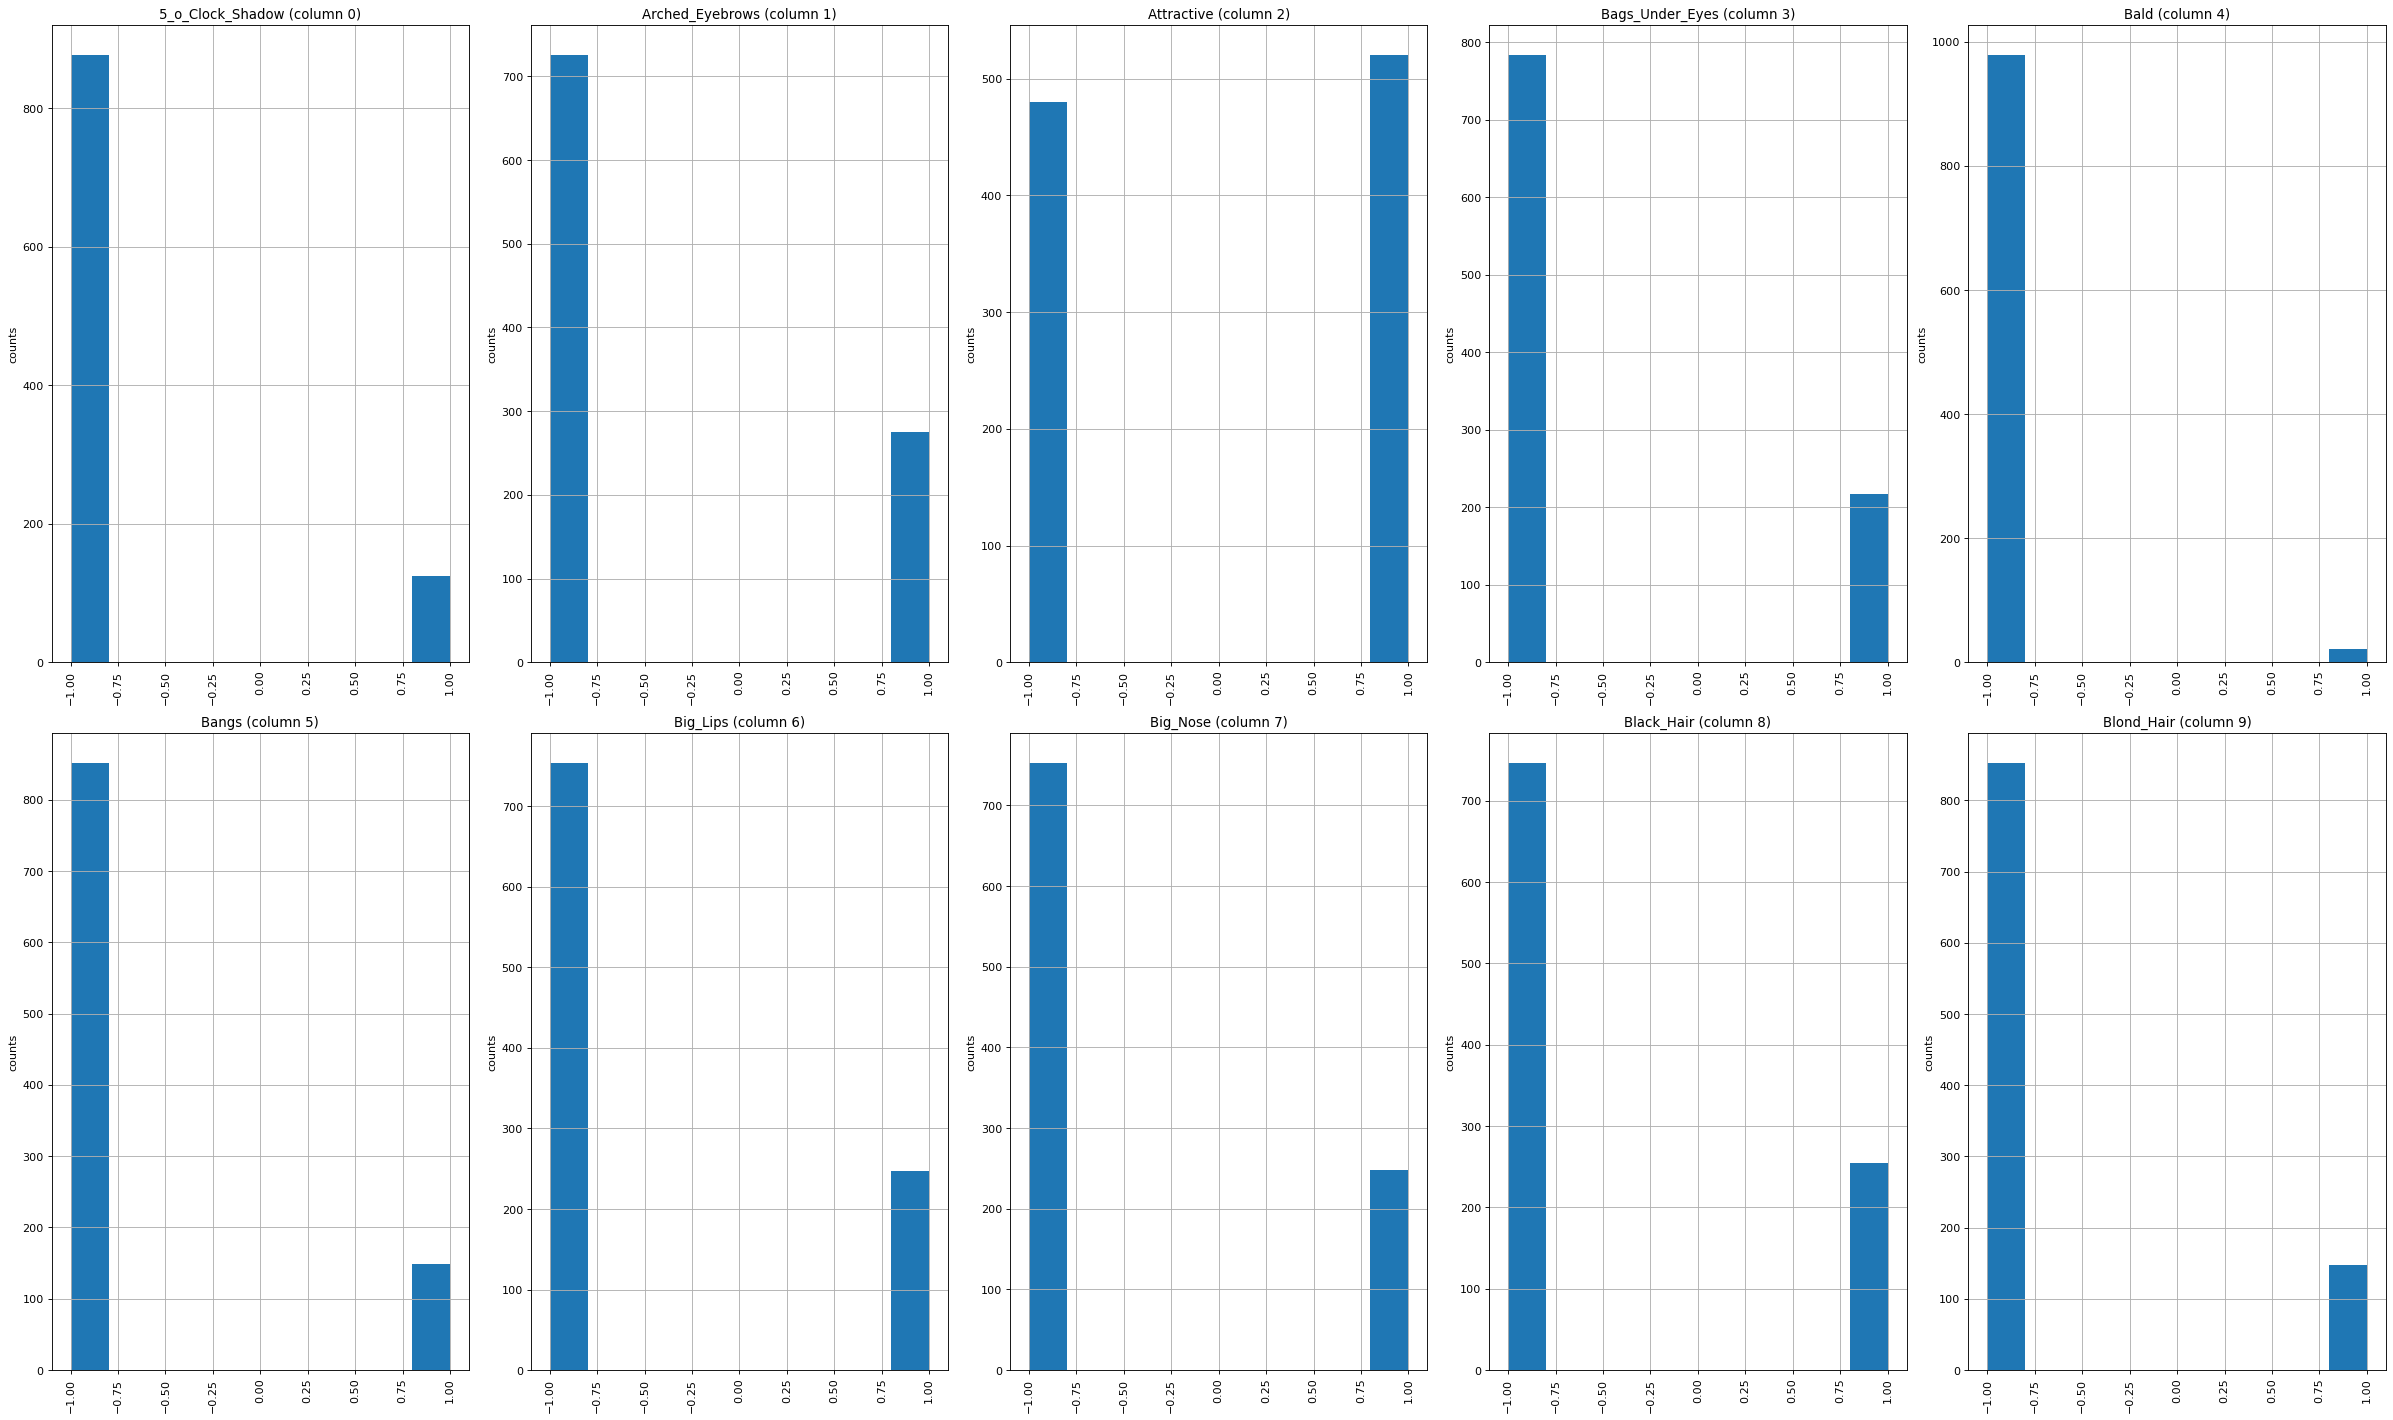

In [8]:
plotPerColumnDistribution(df1, 10, 5) #5 graphs will be displayed in a row for 10 attributes


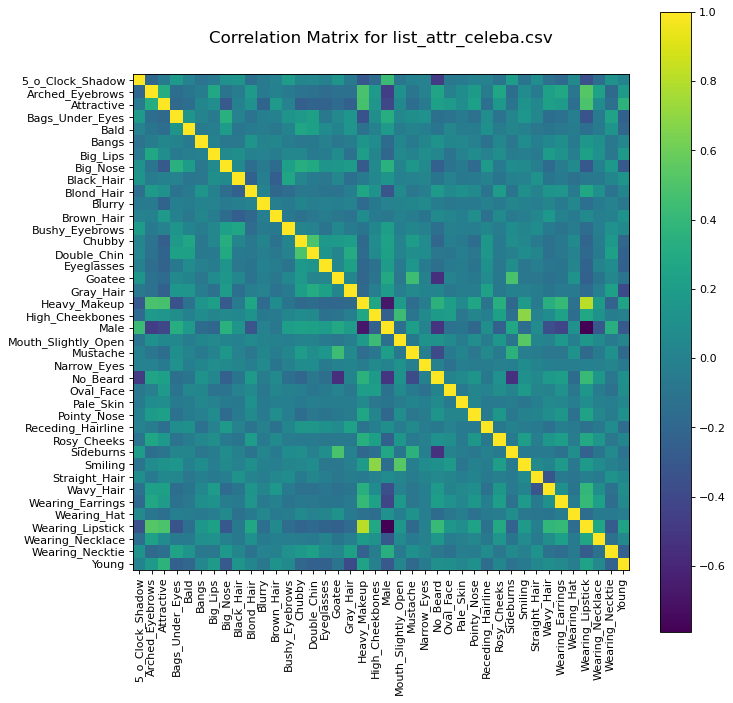

In [9]:
plotCorrelationMatrix(df1, 10)
# 10: graphWidth: second parameter i.e. the width of the graph

# list_bbox_celeba.csv

In [10]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# list_bbox_celeba.csv has 202599 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/truba/home/hkocak/dataHilal/list_bbox_celeba.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'list_bbox_celeba.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [11]:
df2.head(5)

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [12]:
plotPerColumnDistribution(df2, 10, 5)


<Figure size 2400x512 with 0 Axes>

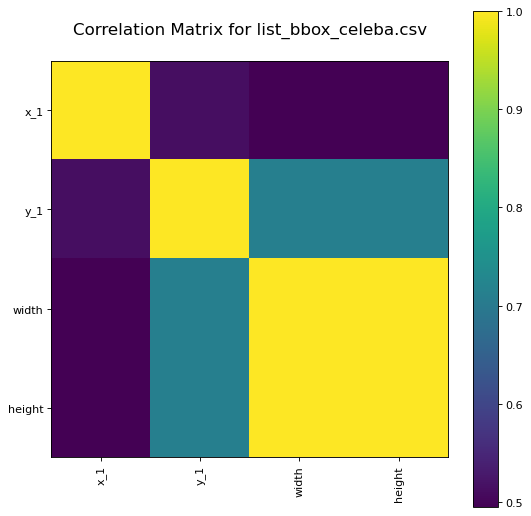

In [13]:
plotCorrelationMatrix(df2, 8)


# list_eval_partition.csv

In [14]:
#Sadece 1000 satırı okuyoruz tüm veriyi okumuyoruz
nRowsRead = 1000 # specify 'None' if want to read whole file
# list_eval_partition.csv has 202599 rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/truba/home/hkocak/dataHilal/list_eval_partition.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'list_eval_partition.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 2 columns


In [15]:
df3.head(5)

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [16]:
plotPerColumnDistribution(df3, 10, 5)


<Figure size 2400x512 with 0 Axes>